In [1]:
from keras.applications import VGG16
from keras.applications import imagenet_utils

from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
import os
import cv2
import pickle
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [2]:
model = VGG16(include_top=False,input_shape=(48,144,3))

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 144, 3)]      0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 144, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 144, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 72, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 72, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 72, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 36, 128)       0     

In [4]:
for l in model.layers:
    l.trainable=False

In [5]:
a = Flatten()(model.output)
a = Dense(64,activation='relu')(a)
a = Dense(32,activation='softmax')(a)
model2 = Model(model.input,a)
model2.compile('adam','categorical_crossentropy',metrics=['accuracy'])


In [6]:
model2.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 144, 3)]      0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 144, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 144, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 72, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 72, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 72, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 36, 128)       0     

In [7]:
with open('encoder.bin','rb')as f:
    encoder = pickle.load(f)

In [8]:
encoder.classes_

array(['2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z'], dtype='<U1')

In [9]:
def datagenerator(path, batch_size=100,c=0):
    pattern= os.path.join(path,'*.png')
    fills= glob(pattern)
    offset=0
    while True:
        offset = 0
        while offset<len(fills):
            items = fills[offset:offset+batch_size]
            offset+=batch_size
            x = []
            y = []
            for f in items:
                char = list(os.path.splitext(os.path.basename(f))[0])[c]
                im = cv2.imread(f)
                # im = img_to_array(im)
                im = cv2.resize(im,(144,48))
                im = imagenet_utils.preprocess_input(im)
                
                x.append(im)
                y.append(to_categorical(encoder.transform([char]),num_classes=len(encoder.classes_)).reshape(-1))
            X = np.array(x,ndmin=4)
            Y = np.array(y,ndmin=2)
            yield X,Y

In [10]:
data = datagenerator('../2_1_Convolutional/train/')
x, y = next(data)
print(len(x), len(y))
print(x.shape, y.shape)


100 100
(100, 48, 144, 3) (100, 32)


In [ ]:
train_path = '../2_1_Convolutional/train/'
train_files = glob(os.path.join(train_path, '*.png'))
batch_size = 100

steps_per_epoch = len(train_files) // batch_size
h = model2.fit(datagenerator('../2_1_Convolutional/train/'),epochs=20  ,  steps_per_epoch=steps_per_epoch,)


Epoch 1/10
98/98 [==============================] - 37s 239ms/step - loss: 4.6725 - accuracy: 0.0085
Epoch 2/10
98/98 [==============================] - 28s 239ms/step - loss: 3.4029 - accuracy: 0.0317
Epoch 3/10
98/98 [==============================] - 23s 238ms/step - loss: 3.4023 - accuracy: 0.0763
Epoch 4/10
98/98 [==============================] - 23s 238ms/step - loss: 3.1282 - accuracy: 0.0837
Epoch 5/10
98/98 [==============================] - 23s 239ms/step - loss: 3.0521 - accuracy: 0.1177
Epoch 6/10
98/98 [==============================] - 24s 242ms/step - loss: 2.9222 - accuracy: 0.1850
Epoch 7/10
98/98 [==============================] - 32s 323ms/step - loss: 2.7956 - accuracy: 0.1914
Epoch 8/10
98/98 [==============================] - 23s 239ms/step - loss: 2.6573 - accuracy: 0.2256
Epoch 9/10
98/98 [==============================] - 24s 246ms/step - loss: 2.4488 - accuracy: 0.2601
Epoch 10/10
98/98 [==============================] - 23s 239ms/step - loss: 2.3664 - accura

In [12]:
# def load_data(p):
#     pattern = os.path.join(p,'*.png')
#     files = glob(pattern)
#     x = []
#     y = []
#     for f in files:
#         char = list(os.path.splitext(os.path.basename(f))[0])[0]
#         im = cv2.imread(f)
#         # im = img_to_array(im)
#         im = cv2.resize(im,(144,48))
#         im = imagenet_utils.preprocess_input(im)
        
#         x.append(im)
#         y.append(to_categorical(encoder.transform([char]),num_classes=len(encoder.classes_)).reshape(-1))
#     X = np.array(x,ndmin=4)
#     Y = np.array(y,ndmin=2)
#     return X,Y

# x_train,y_train = load_data('../2_1_Convolutional/train/')
# h = model2.fit(x_train,y_train,epochs=10 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


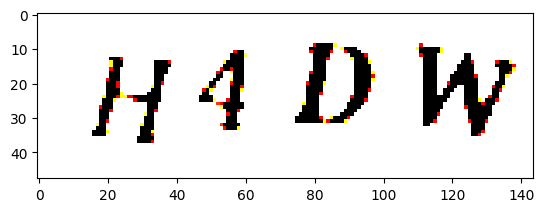

In [16]:
f = ('../2_1_Convolutional/test/H4DW.png')
im = cv2.imread(f)
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im = cv2.resize(im,(144,48))
im = np.array(im)
im = imagenet_utils.preprocess_input(im)
plt.imshow(im)


In [17]:
p = model2.predict(im.reshape(1,48,144,3))

1/1 [==============================] - 0s 171ms/step


In [18]:
encoder.inverse_transform((p[0].argmax(),))

array(['U'], dtype='<U1')